In [37]:
import numpy as np
import os
import matplotlib.pyplot as plt

### 1
Write code to load the data from the file into a numpy array.

In [2]:
root = '/Users/maxperozek/ML-CP341/1/'
data_path = 'bupa.data'
names_path = 'bupa.names'

In [18]:
with open(root + data_path) as f:
    lines = f.readlines()

data_arr = np.zeros(  ( len(lines), len(lines[0].split(sep=',')) )  )

for i in range(len(lines)):
    line_list = lines[i].split(sep=',')
    for j in range(len(line_list)):
        val = line_list[j]
        if '\n' in val:
            val = val[0]
        data_arr[i,j] = float(val)
        

In [20]:
data_arr.shape

(345, 7)

In [33]:
with open(root + names_path) as f:
    names = f.read()

In [34]:
print(names)

1. Title: BUPA liver disorders

2. Source information:
   -- Creators: BUPA Medical Research Ltd.
   -- Donor: Richard S. Forsyth
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990

3. Past usage: 
   -- None known other than what is shown in the PC/BEAGLE User's Guide
      (written by Richard S. Forsyth).

4. Relevant information:
   -- The first 5 variables are all blood tests which are thought
      to be sensitive to liver disorders that might arise from
      excessive alcohol consumption.  Each line in the bupa.data file
      constitutes the record of a single male individual.
   -- It appears that drinks>5 is some sort of a selector on this database.
      See the PC/BEAGLE User's Guide for more information.

5. Number of instances: 345

6. Number of attributes: 7 overall

7. Attribute information:
   1. mcv	mean corpuscular volume
   2. alkphos	alkaline phosphotase
   3. sgpt	alamine amino

### 2
Explore the dataset by calculating some statistics for different variables (e.g. what is the average number of drinks per subject in the dataset?).

In [28]:
arr_means = np.mean(data_arr, axis=0)

In [36]:
print('avg mean corpuscular volume:', arr_means[0])
print('avg alkaline phosphotase:', arr_means[1])
print('avg alamine aminotransferase:', arr_means[2])
print('avg aspartate aminotransferase:', arr_means[3])
print('avg gamma-glutamyl transpeptidase:', arr_means[4])
print('avg drinks per day:', arr_means[5])

avg mean corpuscular volume: 90.15942028985508
avg alkaline phosphotase: 69.8695652173913
avg alamine aminotransferase: 30.405797101449274
avg aspartate aminotransferase: 24.643478260869564
avg gamma-glutamyl transpeptidase: 38.28405797101449
avg drinks per day: 3.455072463768116


### 3
Visualize the dataset in some way. For example, you could do a scatter plot with blue dots for subjects who drink very few drinks and red dots for subjects who drink a lot. Then you could plot those dots on an xy-plane where x and y correspond to values of two of the blood test variables. Are there any patterns that you can see?

In [50]:
grp_1 = data_arr[data_arr[:,6] == 1.0]
grp_2 = data_arr[data_arr[:,6] == 2.0]


In [55]:
# there does not appear to be a meaningful difference in the avg drinks per day between groups
print(np.mean(grp_1, axis=0))
print(np.mean(grp_2, axis=0))

[90.63448276 71.97931034 31.20689655 22.7862069  31.54482759  3.54137931
  1.        ]
[89.815  68.34   29.825  25.99   43.17    3.3925  2.    ]


In [80]:
threshold = 5.0

heavy = data_arr[data_arr[:,5] > threshold]
light = data_arr[data_arr[:,5] <= threshold]

In [81]:
np.mean(heavy, axis=0)

array([92.52272727, 72.88636364, 36.72727273, 28.88636364, 57.17045455,
        7.98863636,  1.48863636])

In [82]:
np.mean(light, axis=0)

array([89.35019455, 68.83657588, 28.24124514, 23.19066148, 31.81712062,
        1.90272374,  1.61089494])

Text(0, 0.5, 'mean corpuscular volume')

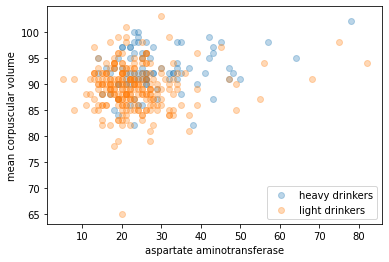

In [83]:
plt.scatter(heavy[:,3],heavy[:,0], label='heavy drinkers', alpha=0.3)
plt.scatter(light[:,3],light[:,0], label='light drinkers', alpha=0.3)

plt.legend()

plt.xlabel('aspartate aminotransferase')
plt.ylabel('mean corpuscular volume')

Text(0, 0.5, 'alamine aminotransferase')

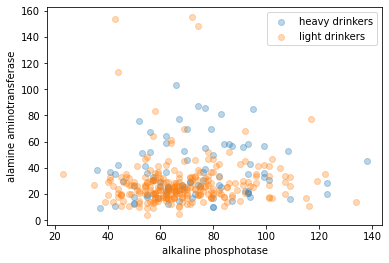

In [84]:
plt.scatter(heavy[:,1],heavy[:,2], label='heavy drinkers', alpha=0.3)
plt.scatter(light[:,1],light[:,2], label='light drinkers', alpha=0.3)
plt.legend()

plt.xlabel('alkaline phosphotase')
plt.ylabel('alamine aminotransferase')

Text(0, 0.5, 'gamma-glutamyl transpeptidase')

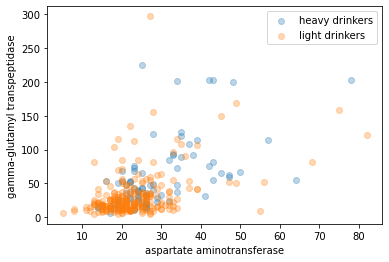

In [86]:
plt.scatter(heavy[:,3],heavy[:,4], label='heavy drinkers', alpha=0.3)
plt.scatter(light[:,3],light[:,4], label='light drinkers', alpha=0.3)
plt.legend()

plt.xlabel('aspartate aminotransferase')
plt.ylabel('gamma-glutamyl transpeptidase')

### 4 
Using some of what you learned by exploring the dataset, create an algorithm to make predictions. The basic function should take as input a vector of blood test values and then return the predicted number of drinks. How does it make this prediction? You decide for this assignment.

In [143]:
def get_avg_drinks(val, feature_slice):
    ref_rows_ub = data_arr[data_arr[:,feature_slice] <= (val*1.025)]
    ref_rows_lb = data_arr[data_arr[:,feature_slice] > (val*0.975)]
    
    ref_rows = np.concatenate((ref_rows_ub, ref_rows_ub))
    return ref_rows[:,5].mean()
    
def predict(vector):
    
    sum_refs = []
    for i in range(5):
        sum_refs.append(get_avg_drinks(vector[i],i))
        
    return np.array(sum_refs).mean()
    

In [138]:
predict(data_arr[4,:])

2.7229435445675856

In [139]:
data_arr[4,5]

0.0

### 5
Calculate your algorithm's prediction mean absolute error. Using several actual subjects from the dataset, put in the blood test values and see how far off your predictions are from the actual number of drinks.

In [140]:
data_arr.shape

(345, 7)

In [141]:
def evaluate(dataset):
    
    errors = []
    for i in range(data_arr.shape[0]):
        actual = dataset[i,5]
        pred = predict(dataset[i,:])
        errors.append(actual - pred)
    errors = np.array(errors)
    errors = np.abs(errors)
    return errors.mean()
    

In [142]:
evaluate(data_arr)

2.497815568690785